In [64]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
commit_df = pd.read_pickle("commits.pkl")

In [3]:
commit_df.shape

(708106, 10)

In [4]:
commit_df = commit_df[(commit_df.author_name != commit_df.committer_name) & (commit_df.authored_datetime != commit_df.committed_datetime)]

In [7]:
commits = commit_df

In [6]:
# top 60

In [58]:
result = {}
for year in range(2006, 2017):
    subset = commits[commits.committed_datetime.map(lambda t: t.year) == year]
    committers = subset.committer_name.value_counts()[:60]
    arr = []
    #for committer in committers.index:
        #df = subset[subset.committer_name == committer]
        #arr.append((df.committed_datetime - df.authored_datetime).mean())
    df = subset[subset.committer_name.isin(committers.index)]
    diff = df.committed_datetime - df.authored_datetime
    quantiles = diff.quantile([0.05, 0.95])
    q_05 = quantiles.loc[0.05]
    q_95 = quantiles.loc[0.95]
    diff = diff[(diff > q_05) & (diff < q_95)]
    #result[year] = arr
    result[year] = {'mean': diff.mean(), 'median': diff.median()}

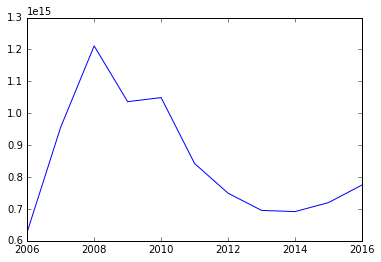

In [59]:
pd.DataFrame(result).T['mean'].plot()

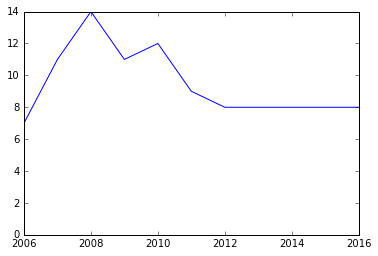

In [72]:
plt.figure(facecolor="white")
(pd.DataFrame(result)/ (86400.0 * 1e9)).T['mean'].plot(ylim=[0,14])

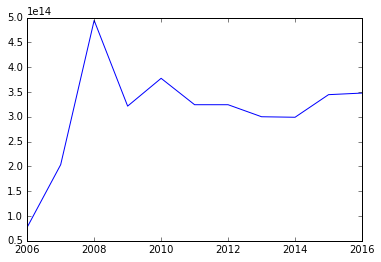

In [61]:
pd.DataFrame(result).T['median'].plot()

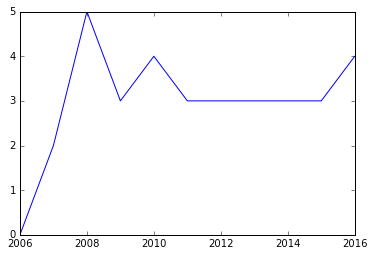

In [66]:
plt.figure(facecolor="white")
(pd.DataFrame(result) / (86400.0 * 1e9)).T['median'].plot()

In [37]:
df2008 = commits[commits.committed_datetime.map(lambda t: t.year) == 2008]

In [75]:
df2008['delay'] = df2008.committed_datetime - df2008.authored_datetime

D:\Dev\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [44]:
df2008['delay'].describe()

count                      31083
mean     18 days 19:32:10.514429
std      58 days 22:59:09.551317
min         -8035 days +01:02:08
25%       0 days 13:19:02.500000
50%              5 days 18:50:41
75%      24 days 18:16:27.500000
max            674 days 08:21:34
Name: delay, dtype: object

In [45]:
df2008.sort_values(by="delay", ascending=False)

,hexsha,authored_datetime,author_name,author_email,committed_datetime,committer_name,committer_email,summary,message,files,diff,delay
582327,040dcc3e5194d0170727adc5df213cfe9d994302,2007-02-24 11:31:40+00:00,Manu Abraham,abraham.manu@gmail.com,2008-12-29 19:53:14+00:00,Mauro Carvalho Chehab,mchehab@redhat.com,V4L/DVB (9378): Add STB6100 Support,V4L/DVB (9378): Add STB6100 Support\n\nSigned-...,"drivers/media/dvb/frontends/Kconfig,drivers/me...",674 days 08:21:34,674 days 08:21:34
582328,c46b65621007a2ede49464d227f64dd3a909a109,2007-02-24 11:31:40+00:00,Manu Abraham,abraham.manu@gmail.com,2008-12-29 19:53:14+00:00,Mauro Carvalho Chehab,mchehab@redhat.com,V4L/DVB (9377): Add STB6100 Support,V4L/DVB (9377): Add STB6100 Support\n\nSigned-...,"drivers/media/dvb/frontends/stb6100.c,drivers/...",674 days 08:21:34,674 days 08:21:34
582325,b797c206168992e8a2c080e80e39a56410cdaac0,2007-02-24 12:14:39+00:00,Manu Abraham,abraham.manu@gmail.com,2008-12-29 19:53:14+00:00,Mauro Carvalho Chehab,mchehab@redhat.com,V4L/DVB (9380): FIX: a possible division by zero,V4L/DVB (9380): FIX: a possible division by ze...,drivers/media/dvb/frontends/stb0899_algo.c,674 days 07:38:35,674 days 07:38:35
620086,1f5826bd0ed6c0abec3da28dfffb8d12f0c2cb81,2006-05-08 17:02:16+00:00,Chris Dearman,chris@mips.com,2008-03-12 14:14:40+00:00,Ralf Baechle,ralf@linux-mips.org,[MIPS] Added missing cases for rdhwr emulation,[MIPS] Added missing cases for rdhwr emulation...,arch/mips/kernel/traps.c,673 days 21:12:24,673 days 21:12:24
607415,b453917ac45d6077955c096d8d5503754b0c13b4,2006-12-13 06:36:13+00:00,Magnus Damm,damm@opensource.se,2008-06-24 13:33:43+00:00,Dominik Brodowski,linux@dominikbrodowski.net,pcmcia: Remove unused header file code,pcmcia: Remove unused header file code\n\npcmc...,"include/pcmcia/cs.h,include/pcmcia/cs_types.h",559 days 06:57:30,559 days 06:57:30
607431,cbba0de2f8e4d9bef521d092711a3c8625f7791b,2006-12-13 06:40:18+00:00,Magnus Damm,damm@opensource.se,2008-06-24 13:33:37+00:00,Dominik Brodowski,linux@dominikbrodowski.net,pcmcia: Update email address for m8xx driver a...,pcmcia: Update email address for m8xx driver a...,drivers/pcmcia/m8xx_pcmcia.c,559 days 06:53:19,559 days 06:53:19
582324,54c358fc23a4ca6c75bc0f8c6b3864ae16cba803,2007-07-02 11:44:32+00:00,Manu Abraham,abraham.manu@gmail.com,2008-12-29 19:53:14+00:00,Mauro Carvalho Chehab,mchehab@redhat.com,V4L/DVB (9381): On the KNC1 cards the CLOCK is...,V4L/DVB (9381): On the KNC1 cards the CLOCK is...,drivers/media/dvb/frontends/stb0899_drv.c,546 days 08:08:42,546 days 08:08:42
582323,795b72b21a566b9e440e7e8afadcfa76386c1cb2,2007-07-02 12:01:48+00:00,Manu Abraham,abraham.manu@gmail.com,2008-12-29 19:53:14+00:00,Mauro Carvalho Chehab,mchehab@redhat.com,V4L/DVB (9382): Use a delay for tracking acqui...,V4L/DVB (9382): Use a delay for tracking acqui...,drivers/media/dvb/frontends/stb0899_drv.c,546 days 07:51:26,546 days 07:51:26
582322,bb29cc6ffa15bc2c4f2c014a44d995368244e7ba,2007-07-02 12:08:23+00:00,Manu Abraham,abraham.manu@gmail.com,2008-12-29 19:53:14+00:00,Mauro Carvalho Chehab,mchehab@redhat.com,V4L/DVB (9383): Let's neither sleep nor wakeup...,V4L/DVB (9383): Let's neither sleep nor wakeup...,drivers/media/dvb/frontends/stb0899_drv.c,546 days 07:44:51,546 days 07:44:51
582321,381d8047031d8b7c2aca4b0dd624108c807262ec,2007-07-02 12:36:47+00:00,Manu Abraham,abraham.manu@gmail.com,2008-12-29 19:53:14+00:00,Mauro Carvalho Chehab,mchehab@redhat.com,V4L/DVB (9384): FIX: register value is not res...,V4L/DVB (9384): FIX: register value is not res...,drivers/media/dvb/frontends/stb0899_algo.c,546 days 07:16:27,546 days 07:16:27


In [5]:
# all

In [5]:
commits = commit_df[commit_df.message.map(lambda m: "Merge " not in m)]

result = {}
for year in range(2010, 2018):
    subset = commits[commits.committed_datetime.map(lambda t: t.year) == year]
    committers = subset.committer_name.value_counts()[:50].index
    arr = []
    for committer in committers:
        selected = subset[subset.committer_name == committer]
        arr.append((selected.committed_datetime - selected.authored_datetime).median())
    result[year] = arr

In [6]:
result_df = pd.DataFrame(result)

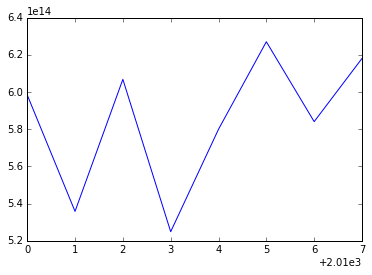

In [7]:
result_df.median().plot()

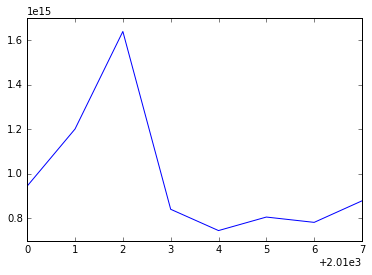

In [8]:
result_df.mean().plot()

In [73]:
commits = commit_df[commit_df.message.map(lambda m: "Merge " not in m)]

result = {}
for year in range(2010, 2018):
    subset = commits[commits.committed_datetime.map(lambda t: t.year) == year]
    committers = subset.committer_name.value_counts()[:20].index
    selected = subset[subset.committer_name.isin(committers)]
    delta = selected.committed_datetime - selected.authored_datetime
    delta = delta[delta.map(lambda t: t.total_seconds() > 0)]
    result[year] = delta.median()

In [74]:
pd.DataFrame(result)

ValueError: If using all scalar values, you must pass an index

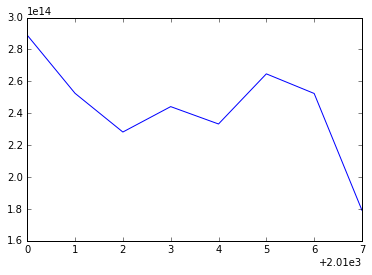

In [76]:
pd.Series(result).plot()

In [77]:
delta = selected.committed_datetime - selected.authored_datetime

In [80]:
delta[delta.map(lambda t: t.total_seconds() == 0)]

0       0 days
50      0 days
51      0 days
132     0 days
147     0 days
161     0 days
209     0 days
224     0 days
239     0 days
306     0 days
337     0 days
385     0 days
562     0 days
613     0 days
623     0 days
852     0 days
906     0 days
1114    0 days
1187    0 days
1249    0 days
1259    0 days
1322    0 days
1420    0 days
1471    0 days
1549    0 days
1779    0 days
1956    0 days
2061    0 days
2101    0 days
2232    0 days
         ...  
53251   0 days
53444   0 days
53641   0 days
53868   0 days
53895   0 days
54158   0 days
54967   0 days
55014   0 days
55212   0 days
55227   0 days
55666   0 days
55778   0 days
56316   0 days
56377   0 days
56382   0 days
56387   0 days
56493   0 days
56791   0 days
57226   0 days
57654   0 days
57801   0 days
57867   0 days
58131   0 days
58270   0 days
58393   0 days
58421   0 days
59103   0 days
59105   0 days
59173   0 days
59215   0 days
Length: 396, dtype: timedelta64[ns]